In [523]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' 

# 一、数据预处理

## 1.导入数据并删除缺失值

In [524]:
df =pd.read_csv('adult2.csv')
print("Befor drop na the df length is %d"%len(df))
df.replace(to_replace=' ?',value=np.nan,inplace=True) #将？替换为nan
df=df.dropna() #删除缺失值
print("After drop na the df length is %d"%len(df))
df.head()

Befor drop na the df length is 32561
After drop na the df length is 30162


,age,workclass,fnlwgt,education:,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2.整体数据探索

In [525]:
print(df['class'].value_counts()) #收入数据分布情况
df.describe() #数据整体描述

 <=50K    22654
 >50K      7508
Name: class, dtype: int64


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education:      30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  class           30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# 二、对年龄进行数据探索

## 1.探索年龄分布和平均年龄

(<Figure size 1080x576 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

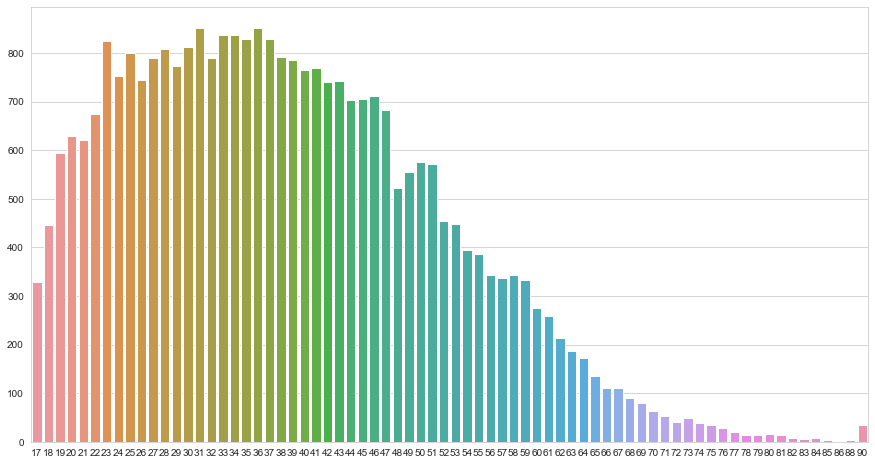

mean age is 38.4


In [527]:
plt.subplots(figsize=(15, 8))
s=df['age'].value_counts()
sns.set_style("whitegrid")
sns.barplot(x=s.index,y=s.values)
plt.show()
print('mean age is %-3.1f'%(df.age.mean()))

## 2.对不同年龄段的收入情况进行探索

<AxesSubplot:>

<AxesSubplot:>

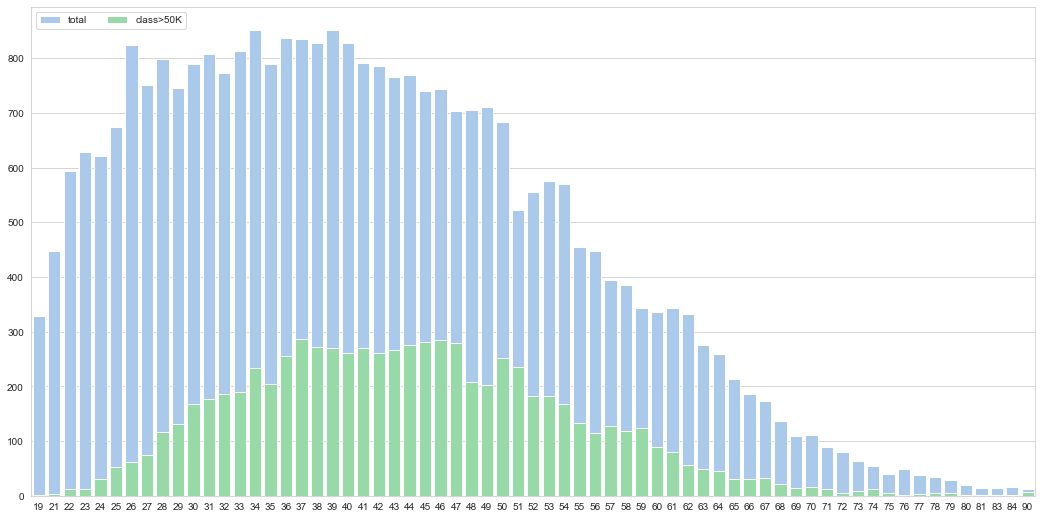

In [528]:
s=df['age'].value_counts()
k=df['age'][df['class']==' >50K'].value_counts()
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=s.index,y=s.values,label='total',color="b")
sns.barplot(x=k.index,y=k.values,label='class>50K',color="g")
ax.legend(ncol=2, loc="upper left", frameon=True)

# 三、Race(种族)数据探索

## 1.探索种族分布

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

([<matplotlib.patches.Wedge at 0x155b8b86e80>,
 [Text(-0.9950012044962713, 0.4690123698272463, ' White'),
  Text(0.9155304904103451, -0.6097572641051464, ' Black'),
  Text(1.0778718234134095, -0.21952752057874658, ' Asian-Pac-Islander'),
  Text(1.0966632250253419, -0.08561408106740762, ' Amer-Indian-Eskimo'),
  Text(1.0996816174365784, -0.02646394286705514, ' Other')],
 [Text(-0.5427279297252388, 0.25582492899667975, '86.0%'),
  Text(0.4993802674965518, -0.33259487133007987, '9.3%'),
  Text(0.5879300854982232, -0.11974228395204357, '3.0%'),
  Text(0.5981799409229137, -0.04669858967313142, '0.9%'),
  Text(0.5998263367835882, -0.01443487792748462, '0.8%')])

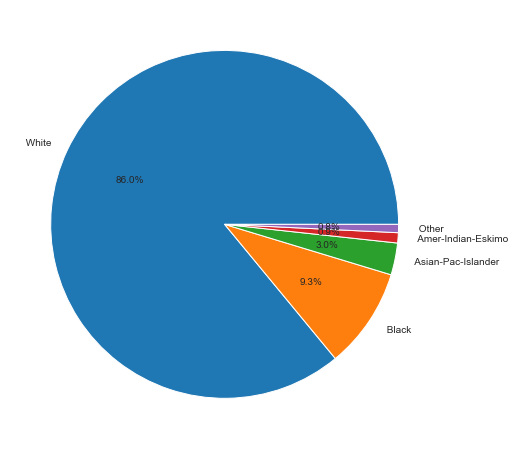

In [529]:
plt.subplots(figsize=(8, 8))
s=df['race'].value_counts()
plt.pie(s.values, labels=s.index, autopct='%1.1f%%')

## 2.探索种族的收入占比情况

<AxesSubplot:xlabel='race', ylabel='<=50K'>

<AxesSubplot:xlabel='race', ylabel='>50K'>

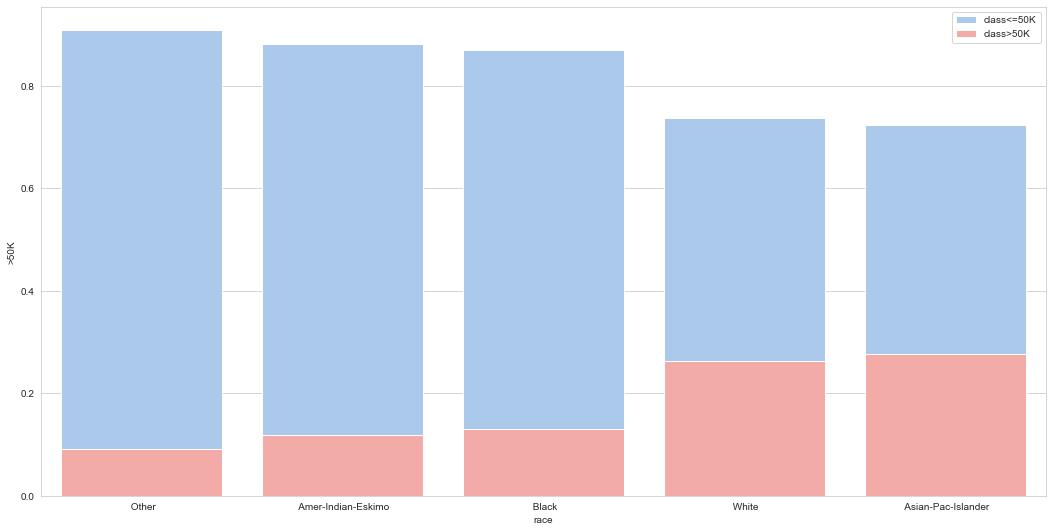

,size,>50K,<=50K
count,5.00000,5.000000,5.000000
mean,6032.40000,0.176106,0.823894
std,11174.10971,0.087379,0.087379
min,231.00000,0.090909,0.722905
25%,286.00000,0.118881,0.736282
50%,895.00000,0.129925,0.870075
75%,2817.00000,0.263718,0.881119
max,25933.00000,0.277095,0.909091


In [530]:
c = df.groupby(["race"],as_index=False).size()
d = df.groupby(["race","class"],as_index=False).size()
c.insert(c.shape[1],'>50K',0.0)
c.insert(c.shape[1],'<=50K',0.0)
for idx,r in c.iterrows():
    e = d[(d["class"]==" >50K") & (d["race"]==r["race"])]
    if len(e)>0:
        c.iat[idx,2]=e["size"]/r["size"]
    e = d[(d["class"]==" <=50K") & (d["race"]==r["race"])]
    if len(e)>0:
        c.iat[idx,3]=e["size"]/r["size"]
c = c.sort_values(by=">50K")
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(18, 9))
sns.set_color_codes("pastel")
sns.barplot(x=c['race'],y=c['<=50K'],label='class<=50K',color="b")
sns.barplot(x=c['race'],y=c['>50K'],label='class>50K',color="r")
ax.legend(ncol=1, loc="upper right", frameon=True)
plt.show()
c.describe()

# 四、资本收益与资本损失分析

## 1.资本损失/收益密度分析

count    1427.000000
mean     1867.898388
std       361.857358
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64

count     2538.000000
mean     12977.596927
std      22311.914505
min        114.000000
25%       3464.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

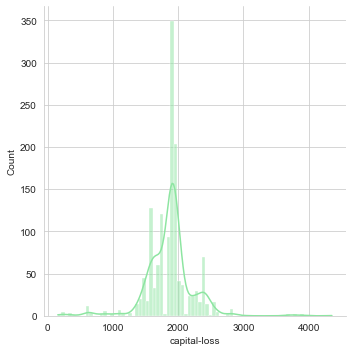

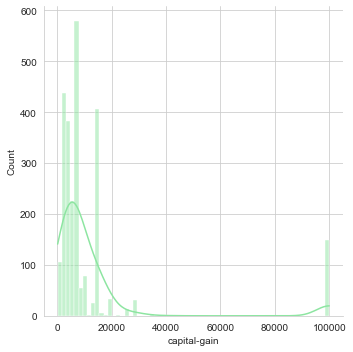

In [581]:

# df['capital-loss'][df['capital-loss']>0].plot.kde(color="g")
# df['capital-gain'][df['capital-gain']>0].plot.kde(color="g")
# sns.kdeplot(df['capital-loss'][df['capital-loss']>0],shade=True,color="g")
# sns.kdeplot(df['capital-gain'][df['capital-gain']>0],shade=True,color="g")
sns.displot(df['capital-loss'][df['capital-loss']>0], kde=True,color="g")
sns.displot(df['capital-gain'][df['capital-gain']>0], kde=True,color="g")
df['capital-loss'][df['capital-loss']>0].describe()
df['capital-gain'][df['capital-gain']>0].describe()


## 2.资本损益整体分析

In [702]:
print("资本收益统计")
print(df['capital-gain'][(df['capital-gain']!=0)|(df['capital-loss']!=0)].agg(['mean','count']))
print("-------------------------")
print("资本损失统计")
print(df['capital-loss'][(df['capital-gain']!=0)|(df['capital-loss']!=0)].agg(['mean','count']))

资本收益统计
mean     8306.971248
count    3965.000000
Name: capital-gain, dtype: float64
-------------------------
资本损失统计
mean      672.254981
count    3965.000000
Name: capital-loss, dtype: float64


## 3.资本损益与Class分析

<AxesSubplot:>

<AxesSubplot:>

[0.5164681149264191, 0.628447596532703]

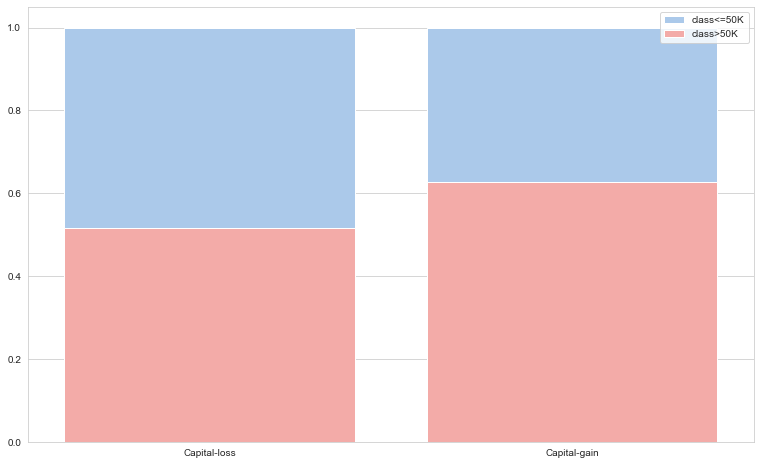

In [703]:
t = df[df['capital-loss']>0]
t2 = df[df['capital-gain']>0]
y1=[len(t[t['class']==' <=50K'])/len(t),len(t2[t2['class']==' <=50K'])/len(t2)]
y2=[1-y1[0],1-y1[1]]

x=["Capital-loss","Capital-gain"]
f, ax = plt.subplots(figsize=(13, 8))
sns.set_color_codes("pastel")
sns.barplot(x=x,y=y1,label='class<=50K',color="b",bottom=y2)
sns.barplot(x=x,y=y2,label='class>50K',color="r")
ax.legend(ncol=1, loc="upper right", frameon=True)

y2

# 五、Native-country数据探索

## 1.Native-country整体探索

In [709]:
c = df['native-country'].value_counts()
c.describe()

count       41.000000
mean       735.658537
std       4286.084703
min          1.000000
25%         19.000000
50%         42.000000
75%         80.000000
max      27504.000000
Name: native-country, dtype: float64

## 2.Native-country数据分析
增加新特征，新特征为某个国家收入>50k的人数占比，并用新特征进行可视化

(<Figure size 1080x576 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='native-country', ylabel='>50K'>

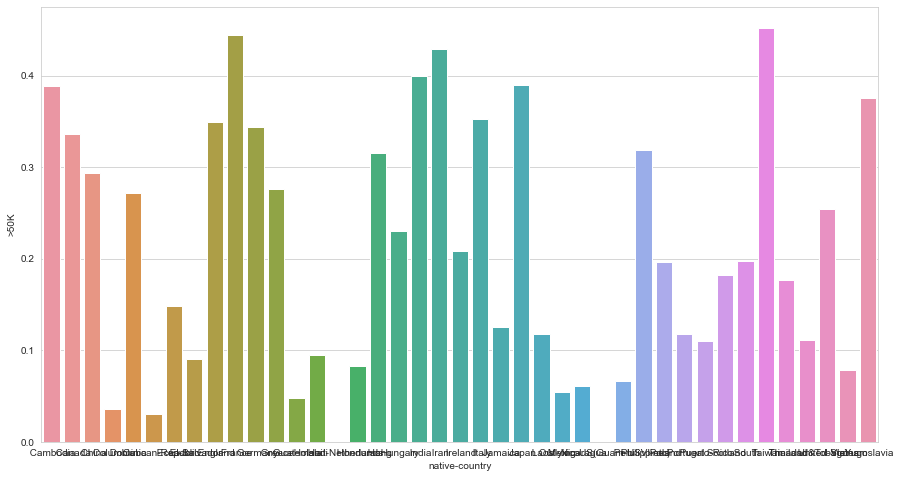

In [710]:
c = df.groupby(["native-country"],as_index=False).size()
d = df.groupby(["native-country","class"],as_index=False).size()
c.insert(c.shape[1],'>50K',0.0)
for idx,r in c.iterrows():
    e = d[(d["class"]==" >50K") & (d["native-country"]==r["native-country"])]
    if len(e)>0:
        c.iat[idx,2]=e["size"]/r["size"]
# c = c.sort_values(by=">50K")
plt.subplots(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(x=c["native-country"],y=c[">50K"])
plt.show()


## 3.Ntive-country数据描述

In [711]:
c.describe()

,size,>50K
count,41.000000,41.000000
mean,735.658537,0.208634
std,4286.084703,0.137759
min,1.000000,0.000000
25%,19.000000,0.090000
50%,42.000000,0.196429
75%,80.000000,0.336449
max,27504.000000,0.452381
